In [1]:
# 1. Perform hierarchical clustering using given distance for a given dataset. analyze the performance using CPCC for various linkage measures. Identify optimum number of cluster using Silhouette index. 
# (GPS Dataset1.csv). (10 marks)  
# a. odd roll numbers (Euclidean distance)
# b. Even roll numbers (Manhattan distance)
# plot the dentogram (5 marks)
# visualize the points using number of clusters identified using Silhouette index (Different colors for different cluster). (5 marks)

# 2. Perform chi-sqaure analysis for given gss dataset
# a. explore the relationship between job preference and education status.(Job preference and education status are independent.)- visualize and interpret ( 5 marks) - Odd roll numbers


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist,pdist

In [3]:
df = pd.read_csv("dataset.csv",header=None)
df

,0,1
0,76.95446,10.88176
1,76.96292,10.85913
2,76.96898,10.86515
3,76.97412,10.86712
4,76.97384,10.86967
...,...,...
2907,79.13229,12.91898
2908,79.13190,12.92141
2909,79.12957,12.92103
2910,76.72108,8.08215


In [4]:
X=df.values
X

array([[76.95446, 10.88176],
       [76.96292, 10.85913],
       [76.96898, 10.86515],
       ...,
       [79.12957, 12.92103],
       [76.72108,  8.08215],
       [80.3203 , 13.21461]])

# 1. Perform hierarchical clustering using given distance for a given dataset. analyze the performance using CPCC for various linkage measures. Identify optimum number of cluster using Silhouette index. 
# (GPS Dataset1.csv). (10 marks)  
a. odd roll numbers (Euclidean distance)

plot the dentogram (5 marks)

visualize the points using number of clusters identified using Silhouette index (Different colors for different cluster). (5 marks)


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [6]:
linked1 = linkage(X, 'single')
linked2 = linkage(X, 'complete')
linked3 = linkage(X, 'average')
linked4 = linkage(X, 'median')
linked5 = linkage(X, 'centroid')

In [7]:
c=[]
for i in [linked1,linked2,linked3,linked4,linked5]:
    c.append(cophenet(i,pdist(X)))

In [8]:
val = []
met = ['single','complete','average','median','centroid']
for i in c:
    val.append(i[0])    

In [9]:
data = {'method':met,'Cophenet':val}
pd.DataFrame(data)

,method,Cophenet
0,single,0.911160
1,complete,0.945526
2,average,0.934422
3,median,0.935107
4,centroid,0.934144


# Complete Linkage has high cophenet distance

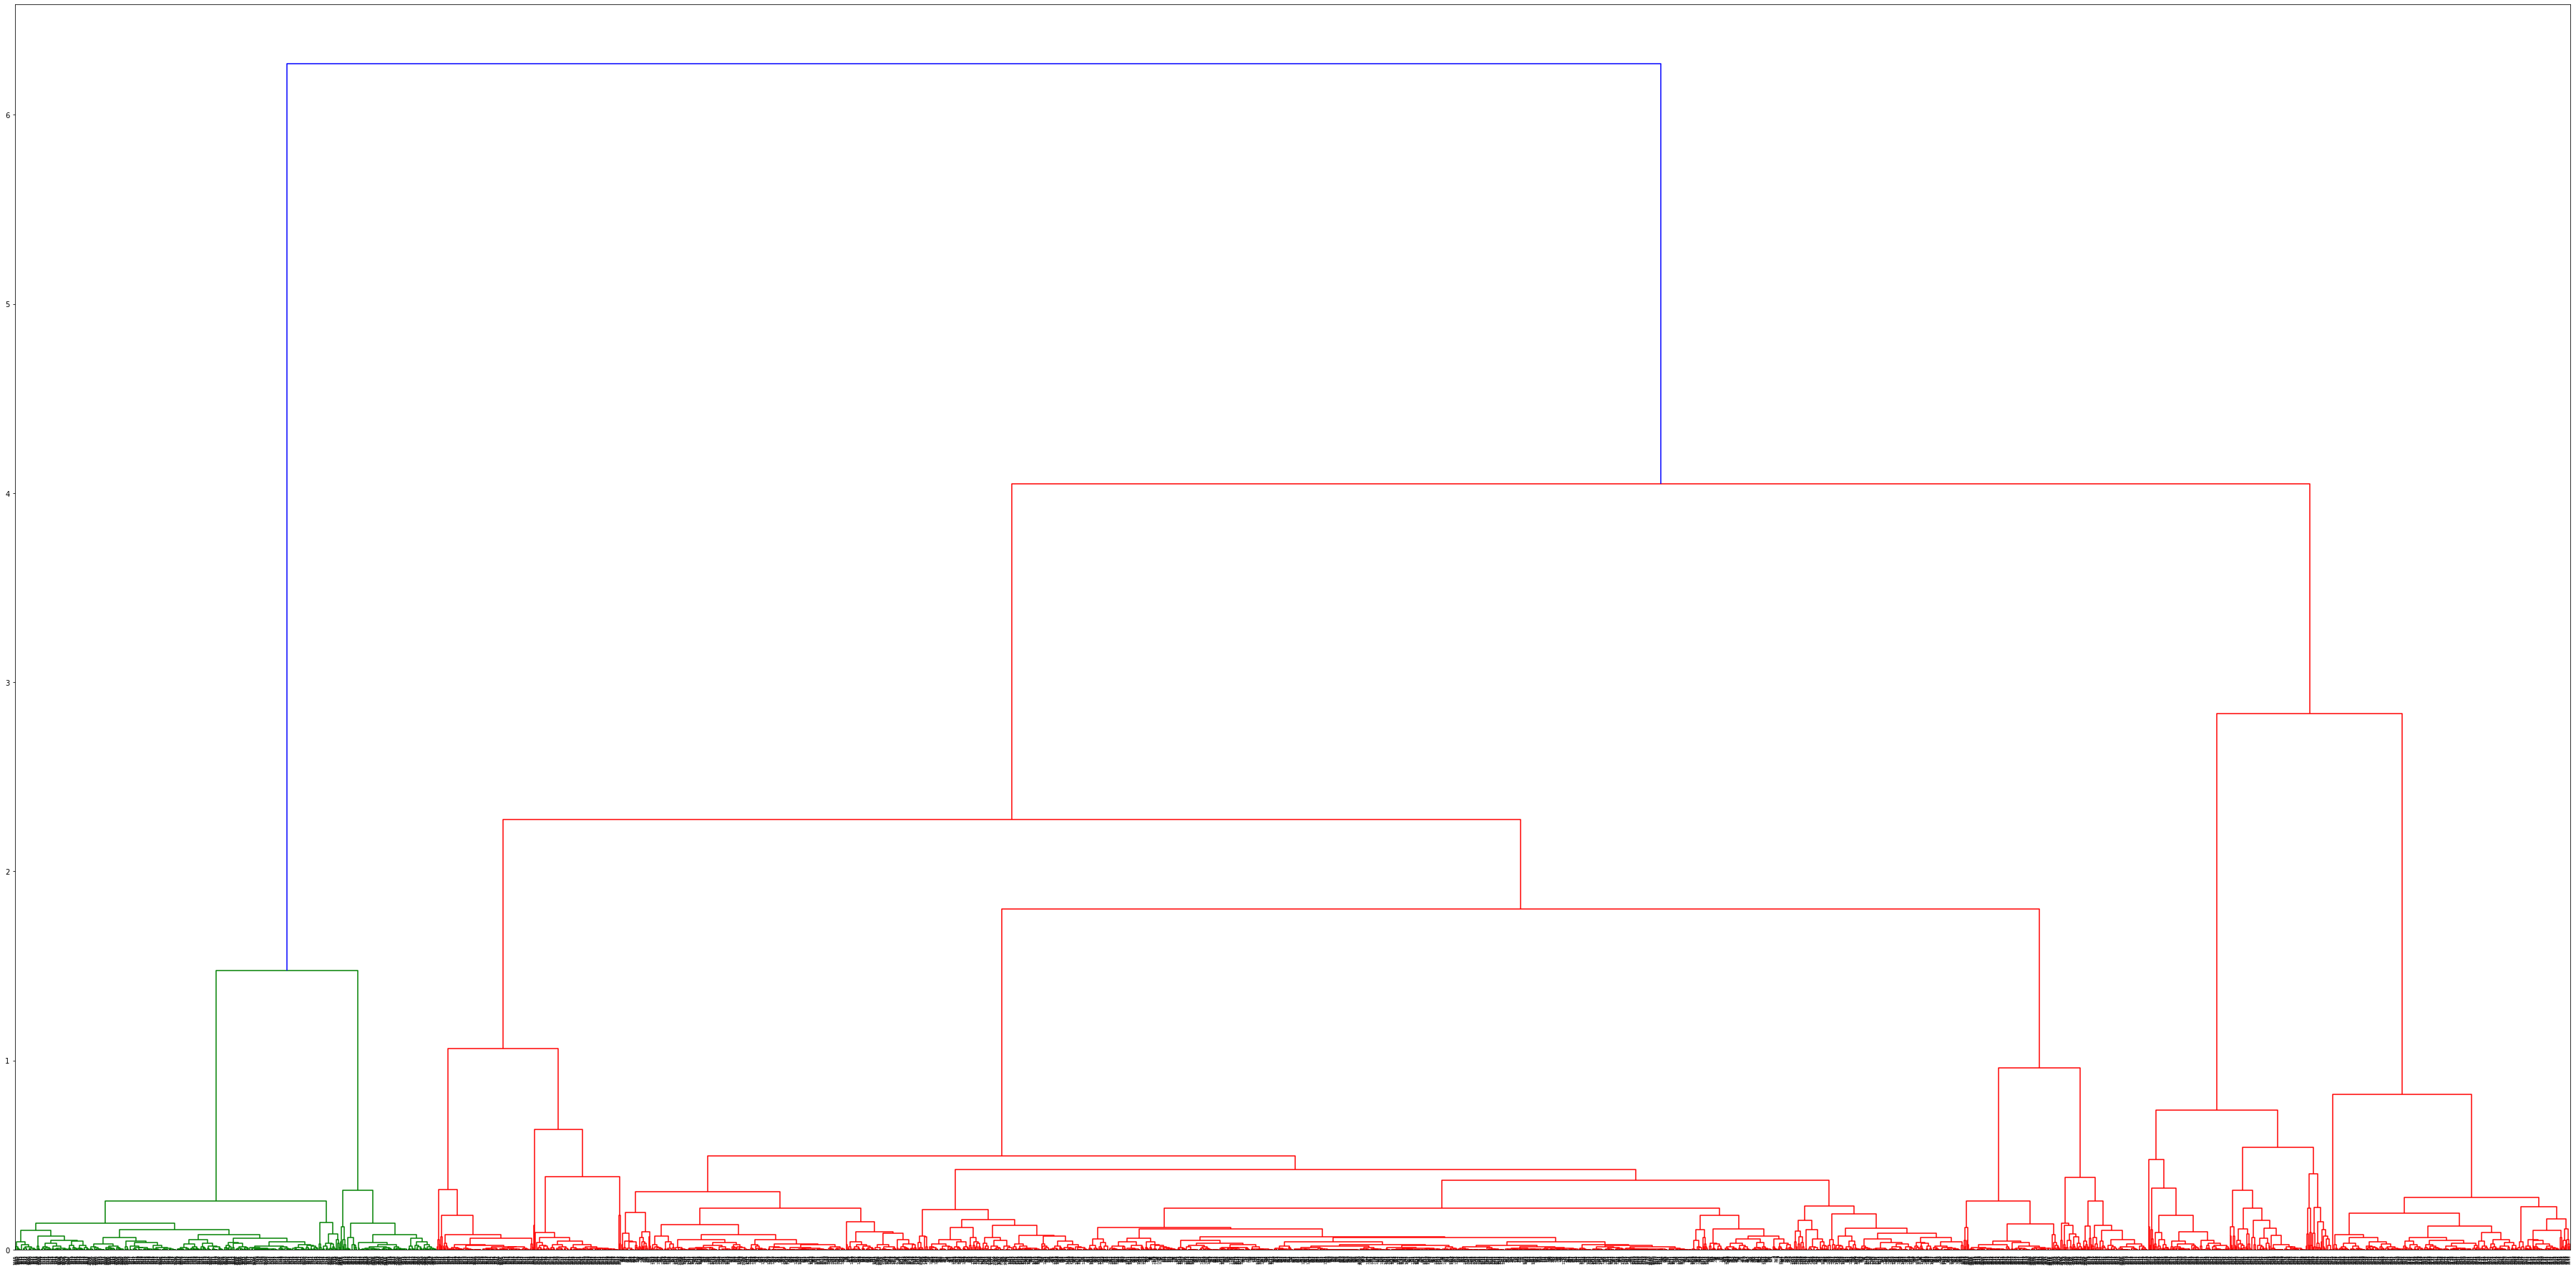

In [10]:
labelList = range(len(X))
plt.figure(figsize=(64, 32))  
dendrogram(linked2,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

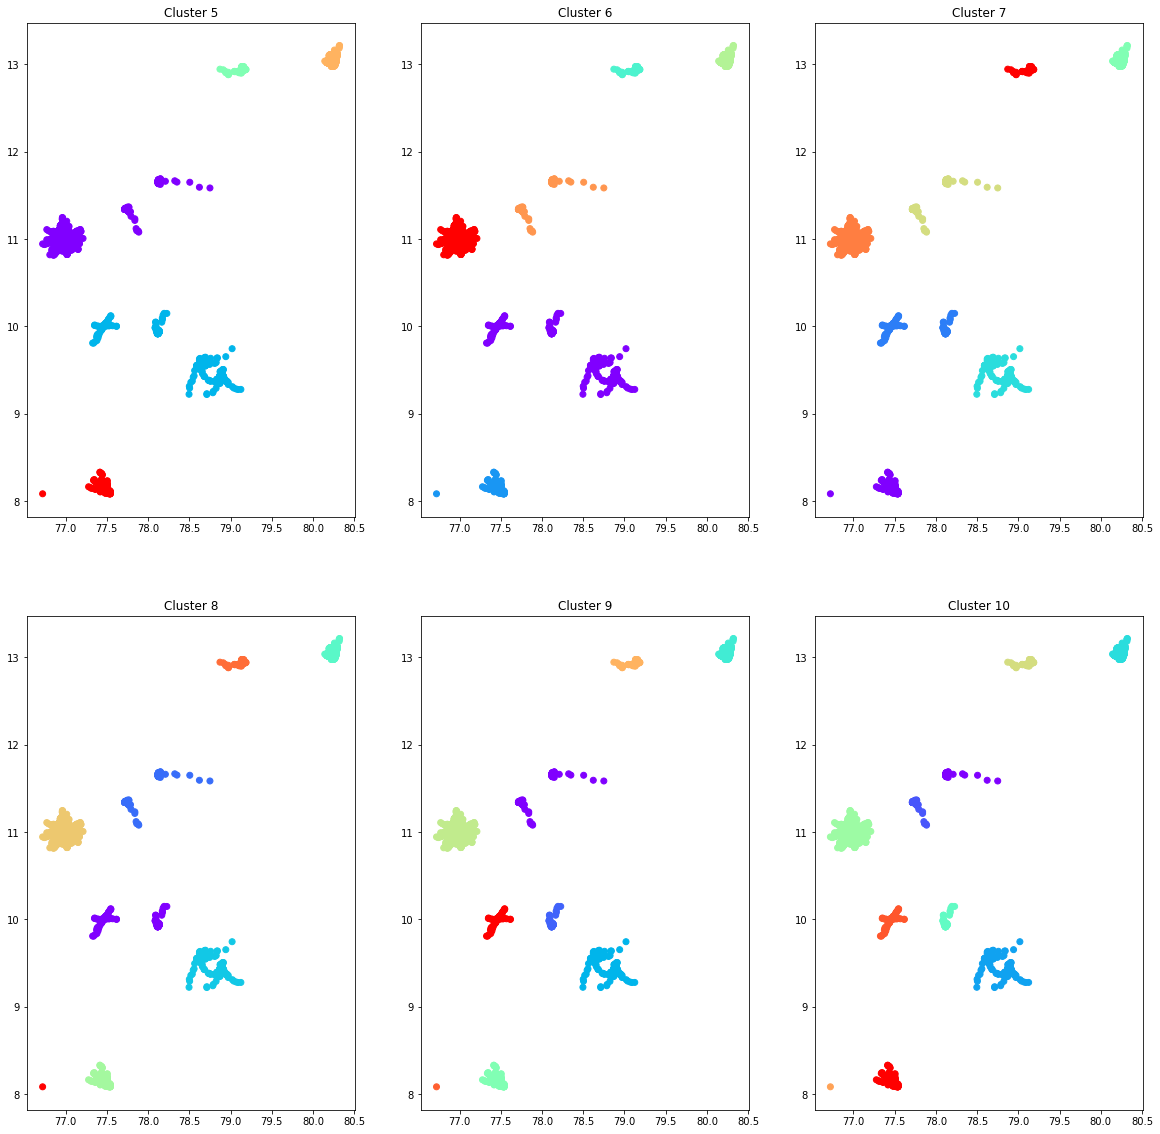

In [11]:
from sklearn.cluster import AgglomerativeClustering
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,20))
j=0
k=0
for i in range(5,11):
    clusters=[]
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    clusters.append(cluster.fit_predict(X))
    axes[k,j].title.set_text("Cluster "+str(i))
    axes[k,j].scatter(X[:,0], X[:,1], c=cluster.labels_,cmap='rainbow') 
    j+=1
    if(j==3):
        k+=1
        j=0
    if(k==3):
        break
    

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
clusters=[]
ss=[]

for i in range(5,11):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')  
    clusters.append(cluster.fit_predict(X)) 
    ss.append(silhouette_score(X,cluster.labels_))

In [14]:
pd.DataFrame({"Clusters":range(5,11),"Silhoutte":ss})

,Clusters,Silhoutte
0,5,0.736492
1,6,0.854910
2,7,0.877793
3,8,0.877986
4,9,0.893984
5,10,0.887905


# Although Silhoutte Score for 9 clusters > 10 clusters . But looking at the plot above. It seems 10 seems a better choice. SO I'm picking 10 as optimum no of clusters

In [15]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete') 
cluster.fit_predict(X)
;

''

In [16]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

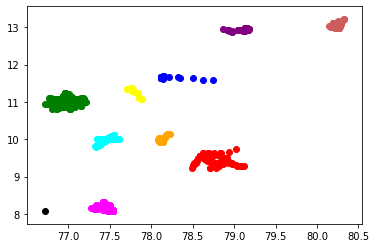

In [19]:
for i in range(len(cluster.labels_)):
    if cluster.labels_[i]==0:
        plt.scatter(X[i][0], X[i][1],c='red',label='Cluster-1')
    if cluster.labels_[i]==1:
        plt.scatter(X[i][0], X[i][1],c='blue',label='Cluster-2')    
    if cluster.labels_[i]==2:
        plt.scatter(X[i][0], X[i][1],c='green',label='Cluster-3')    
    if cluster.labels_[i]==3:
        plt.scatter(X[i][0], X[i][1],c='yellow',label='Cluster-4')    
    if cluster.labels_[i]==4:
        plt.scatter(X[i][0], X[i][1],c='purple',label='Cluster-5')    
    if cluster.labels_[i]==5:
        plt.scatter(X[i][0], X[i][1],c='cyan',label='Cluster-6')    
    if cluster.labels_[i]==6:
        plt.scatter(X[i][0], X[i][1],c='indianred',label='Cluster-7')    
    if cluster.labels_[i]==7:
        plt.scatter(X[i][0], X[i][1],c='magenta',label='Cluster-8')    
    if cluster.labels_[i]==8:
        plt.scatter(X[i][0], X[i][1],c='orange',label='Cluster-9')        
    if cluster.labels_[i]==9:
        plt.scatter(X[i][0], X[i][1],c='black',label='Cluster-10')    

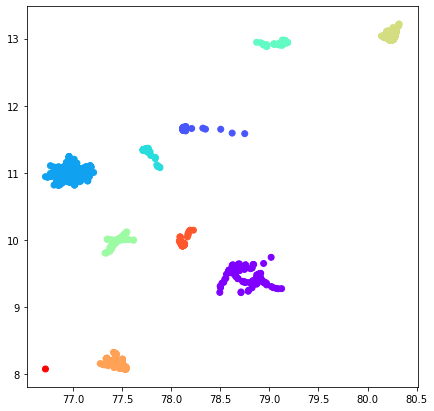

In [98]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')  
cluster.fit_predict(X)
plt.figure(figsize=(7,7))  
plt.scatter(X[:,0], X[:,1], c=cluster.labels_,cmap='rainbow')     
